[![Open in colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FangmingXie/SingleCellArchetype/blob/main/sca/tutorial_complete.ipynb)

# setting up

In [1]:
# installing prerequisite packages (only if in Google Colab)
try:
    import google.colab
    print("Running in Google Colab")
    print("Installing prerequisite packages... (expected time < 1 min)")
    
    !pip install anndata
    !pip install py_pcha
    !wget https://raw.githubusercontent.com/FangmingXie/SingleCellArchetype/refs/heads/main/sca/sca.py
    !wget https://raw.githubusercontent.com/FangmingXie/SingleCellArchetype/refs/heads/main/sca/utils.py
    
except ImportError:
    print("Not running in Google Colab")
    print("Skip installing prerequisite packages.")

Not running in Google Colab


In [2]:
# import packages  
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('poster')

import anndata as sc

from sca import SingleCellArchetype
from utils import plot_archetype

In [3]:
# load sample data
file_name = 'data_snrna_v1.h5ad'
if not os.path.isfile(file_name):
    !wget 'https://raw.githubusercontent.com/FangmingXie/SingleCellArchetype/main/data/data_snrna_v1.h5ad'
    
adata = sc.read(file_name)
adata

--2024-12-19 10:10:31--  https://raw.githubusercontent.com/FangmingXie/SingleCellArchetype/main/data/data_snrna_v1.h5ad
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12172792 (12M) [application/octet-stream]
Saving to: ‘data_snrna_v1.h5ad’

100%[======================================>] 12,172,792  --.-K/s   in 0.1s    

2024-12-19 10:10:31 (93.2 MB/s) - ‘data_snrna_v1.h5ad’ saved [12172792/12172792]



AnnData object with n_obs × n_vars = 4044 × 286
    obs: 'Class_broad', 'Doublet', 'Doublet Score', 'batch', 'leiden', 'n_counts', 'n_genes', 'percent_mito', 'sample', 'Type', 'Subclass', 'cond'
    layers: 'lognorm', 'norm'

In [4]:
# set up SingleCellArchetype object using the sample data 
x = np.array(adata.X.todense())
depths = adata.obs['n_counts'].values
types = adata.obs['Type'].values

sca = SingleCellArchetype(x, depths, types)

# do and shuffle

In [5]:
ndim = 2
noc = 3
sca.setup_feature_matrix(method='data')
xp, aa = sca.proj_and_pcha(ndim, noc)

nrepeats = 3
p = 0.8
aa_dsamps = sca.downsamp_proj_pcha(ndim, noc, nrepeats=nrepeats, p=p)

use data


In [6]:
# gshuff
sca.setup_feature_matrix(method='gshuff')
xp_gshuff, aa_gshuff = sca.proj_and_pcha(ndim, noc)
aa_gshuff_dsamps = sca.downsamp_proj_pcha(ndim, noc, nrepeats=nrepeats, p=p)

use shuffled data


In [7]:
# tshuff 
sca.setup_feature_matrix(method='tshuff')
xp_tshuff, aa_tshuff = sca.proj_and_pcha(ndim, noc)
aa_tshuff_dsamps = sca.downsamp_proj_pcha(ndim, noc, nrepeats=nrepeats, p=p)

use per-type shuffled data


# plot

In [8]:
types_colorvec = np.char.add('C', sca.types_idx.astype(str))

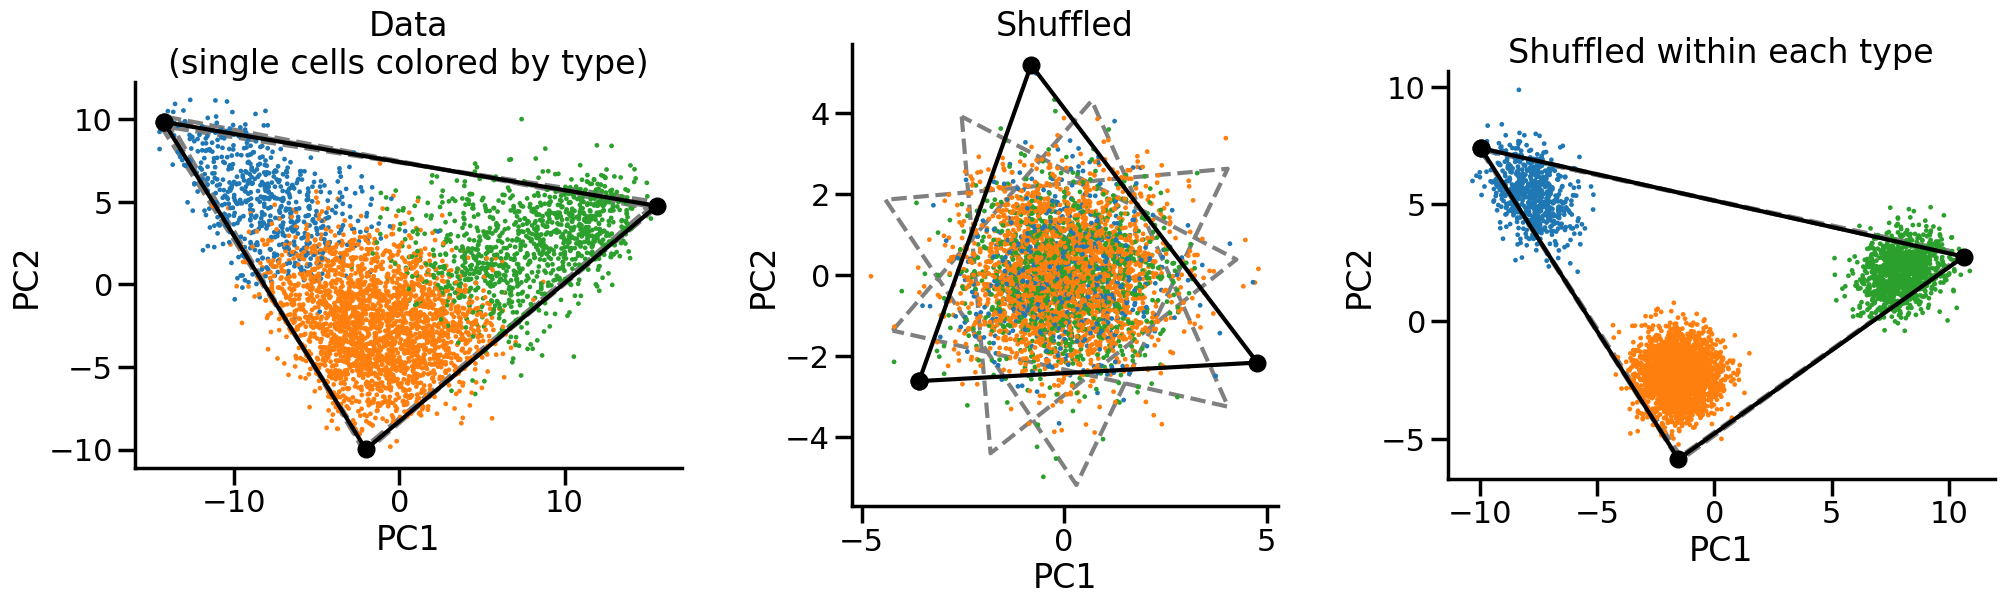

In [9]:
# plot
fig, axs = plt.subplots(1,3,figsize=(8*3,6))
ax = axs[0]
ax.scatter(xp[:,0], xp[:,1], c=types_colorvec, s=2)
plot_archetype(ax, aa, fmt='-o', color='k', zorder=2)
for i in range(nrepeats):
    plot_archetype(ax, aa_dsamps[i], fmt='--', color='gray', zorder=0)
ax.set_title('Data\n(single cells colored by type)')
    
ax = axs[1]
ax.set_title('Shuffled')
ax.scatter(xp_gshuff[:,0], xp_gshuff[:,1], c=types_colorvec, s=2)
plot_archetype(ax, aa_gshuff, fmt='-o', color='k', zorder=2)
for i in range(nrepeats):
    plot_archetype(ax, aa_gshuff_dsamps[i], fmt='--', color='gray', zorder=0)

ax = axs[2]
ax.set_title('Shuffled within each type')
ax.scatter(xp_tshuff[:,0], xp_tshuff[:,1], c=types_colorvec, s=2)
plot_archetype(ax, aa_tshuff, fmt='-o', color='k', zorder=2)
for i in range(nrepeats):
    plot_archetype(ax, aa_tshuff_dsamps[i], fmt='--', color='gray', zorder=0)

for i in range(3):
    ax = axs[i]
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_aspect('equal')
    sns.despine(ax=ax)
    ax.grid(False)
    
plt.show()

# quantify t-ratio 

- for 2-dimensional data only

In [ ]:
t_ratio, t_ratio_shuffs, pval = sca.t_ratio_test(ndim, noc, nrepeats=20)
print(f'p-value: {pval}')

use data
use shuffled data
use shuffled data
use shuffled data
use shuffled data
use shuffled data
use shuffled data
use shuffled data
use shuffled data
use shuffled data
use shuffled data
use shuffled data
use shuffled data
use shuffled data


In [ ]:
fig, ax = plt.subplots()
ax.axvline(t_ratio, color='r', label='data')
sns.histplot(t_ratio_shuffs, ax=ax, stat='density', label='shuffled')
ax.set_xlabel('t-ratio')
ax.legend()
sns.despine(ax=ax)
plt.show()

# quantify stability

In [ ]:
from sklearn.metrics import pairwise_distances

In [ ]:
def get_relative_variation(aa_list):
    """
    """
    
    aa_avg = np.mean(aa_list, axis=0).T
    ref = np.mean(pairwise_distances(aa_avg))

    aa_std = np.std(aa_list, axis=0).T
    epsilon = np.mean(np.sqrt(np.sum(np.power(aa_std,2), axis=1)))
    
    return epsilon/ref

In [ ]:
var_data   = get_relative_variation(aa_dsamps)
var_gshuff = get_relative_variation(aa_gshuff_dsamps)

In [ ]:
fig, ax = plt.subplots(figsize=(3,6))
ax.bar(np.arange(2), [var_data, var_gshuff])
ax.set_xticks(np.arange(2))
ax.set_xticklabels(['data', 'shuffled'], rotation=90)
ax.set_ylabel('Archetype variation\n(higher being less stable)')
plt.show()